# Opioid Overdoses in connecticut from 2012 to June 2017

### By Driss Guessous Last Updated (2018-02-27)

The Goal of this project was to explore a dataset from the DATA.Gov site entitle 'Accidental Drug Related Deaths 2012- June 2017' which can be found at [Data](https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015)

The only other external source for data was a CT government website containg a list of cities by county which can be found [here](http://www.ct.gov/ecd/cwp/view.asp?a=1106&q=250994)

A large amount of missing data regarding the County of Death and the County or Residence were missing. I created a few functions to create new columns using the death location data, which had no missing data, and the residence city data. I used value_counts function to determine which cities had multiple hits that were not in the list of cities then I manually looked them up to determine which county they were in.

## Summary of Results:

### Clustering Analysis:
* The clustering did not show clear groups with particular features.  More work refining the Models paramaters could be done discern possible clusterings.  Alternatively there may not be distinct clusters based upon the features of this dataset

SARIMAX(deaths_per_year.Value, trend='n', order=(1,1,2), seasonal_order=(1,1,1,12))
### Time Series Analyis:
* After refining a SARIMA Model of with ARIMA params of (1,1,2) and a seasonal order coresponding to 12 Months to account for any seasonal variability (i.e. The Hot Summer or Colder Winters can have an effect on Opiod use and therefore OverDoses)
* Clear upward trend was scene in the monthly death counts and the model forecasted a continuation in this non stationary trend. Seen Below:
![Graph](death_forecast.png)


#### Mean Age  =  42

#### Gender = 27% Female, 73% Male
* Roughly a 50-50 split between Men and Women

#### Race= 79% White, 8% Black
* 80% of population is White
* 11% of population is Black

#### Death County = 29% Hartford, 16% Fairfield, 27% New Haven
* Fairfield has the highest population of 26% of population but only 16% of deaths
* Hartfield has 24% of population but accounts for 30% of deaths. 
* New Haven has 24& of population and 27% of death
* The other counties match the census data in # of Deaths and Percentage of Population

###  Census Data from the [Census Bureau](https://www.census.gov/quickfacts/CT) 











## Data Manipulation:

In [1]:
#importing relavant libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing CT opiod overdose deaths data
data = pd.read_csv('data/drug_deaths.csv')

In [3]:
# creating a list of the drug columns who are coded as Y or N
drugs_list = ['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone',
       'Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine (not heroin)', 'Other', 'Any Opioid',]

In [4]:

def clean_drug_columns(entry):
# turning the Y into 1 and N into 0 so that it will work with machine learing algorithim 
    if pd.isnull(entry):
        return 0
    elif entry == 'Y':
        return 1

def clean_all_drugs(drugs):
# applying the Y to 1 N to 0 schema to all columns     
    for drug in drugs:
        data[drug] = data[drug].apply(clean_drug_columns)    
    
        

In [5]:
def fill_missing_drugs(drugs):
#creating function to run through all the drugs and fill the NAN values with 0     
    for drug in drugs:
        data[drug] = data[drug].fillna(0)
clean_all_drugs(drugs_list)
data.Other = data.Other.fillna(0)
fill_missing_drugs(drugs_list)        

In [6]:
#This list was created using http://www.ct.gov/ecd/cwp/view.asp?a=1106&q=250994 the CT gov website showing cities by county, used to clean up data
Fairfield = 'Bethel, Bridgeport, Brookfield, Danbury, Darien, Easton, Fairfield, Greenwich, Monroe, New Canaan, New Fairfield, Newtown, Norwalk,  Shelton, Sherman, Stamford, Stratford, Redding, Ridgefield, Trumbull, Weston, Westport, Wilton'
Hartford = 'Avon, Berlin, Bloomfield, Bristol, Burlington, Canton, East Granby, East, Hartford, , East Windsor, Enfield, Farmington, Glastonbury, Granby, Hartford, Hartland, Manchester, Marlborough, New Britain, Newington, Plainville, Rocky  Hill, Simsbury, Southington, South Windsor, Suffield, West Hartford, Wethersfield, Windsor, Windsor Locks, East Hartford, S Glastonbury'
Litchfield = 'Barkhamsted, Oakville, Winsted, Bethlehem, Bridgewater, Canaan, Colebrook, Cornwall, Goshen, Harwinton, Kent, Litchfield, Morris, New Hartford, New Milford, Norfolk, North Canaan, Plymouth, Roxbury, Salisbury, Sharon, Thomaston, Torrington, Warren, Washington, Watertown, Winchester, Woodbury'
Middlesex = 'Chester, Clinton, Cromwell, Deep River, Durham, East Haddam, East Hampton, Essex, Haddam, Killingworth, Middlefield, Middletown, Old Saybrook, Portland, Westbrook'
New_Haven = 'Ansonia, W Haven, E Haven, Beacon Falls, Bethany, Branford, Cheshire, Derby, East Haven, Guilford, Hamden, Madison, Meriden, Middlebury, Milford, Naugatuck, New Haven, North Branford, North Haven, Orange, Oxford, Prospect, Seymour, Southbury, Wallingford, Waterbury, West Haven, Wolcott, Woodbridge'
New_London = 'Bozrah, Oakdale, Mystic, Uncasville, Colchester, East Lyme, Franklin, Griswold, Groton, Lebanon, Ledyard, Lisbon, Lyme, Montville, New London, North Stonington, Norwich, Old Lyme, Preston, Salem, Sprague, Stonington, Voluntown, Waterford'
Tolland = 'Andover, Bolton, Columbia, Coventry, Ellington, Hebron, Mansfield, Somers, Stafford, Tolland, Union, Vernon, Willington'
Windham = 'Ashford, East Woodstock, Willimantic, Brooklyn, Canterbury, Chaplin, Eastford, Hampton, Killingly, Plainfield, Pomfret, Putnam, Scotland, Sterling, Thompson, Windham, Woodstock'

In [7]:
#creating dictionary between the cities and the county name
counties_list = {'Fairfield':Fairfield,'Windham':Windham,'Tolland':Tolland,
                 'New London':New_London,'New Haven':New_Haven,'Middlesex':Middlesex,
                 'Litchfield':Litchfield,'Hartford':Hartford}

In [8]:
def clean_counties_list(county):
# function used to turn the raw long strings in the imported data to individual city entries 
    county = [x.strip() for x in county.split(',')]
    return county
for key,value in counties_list.items():
        counties_list[key] = clean_counties_list(value)

In [9]:
#running through the Residence city column and using this to create new column where the counties are based off of this data 
for index, row in data.iterrows():
    if pd.notnull(row['Residence City']) and pd.notnull(row['Residence County']):
        data.loc[index,'New_Res_Counties'] = row['Residence County'].lower().title()
        
    elif pd.isnull(row['Residence City']) and pd.isnull(row['Residence County']):
        data.loc[index,'New_Res_Counties'] = 'Unknown'
        
    elif pd.notnull(row['Residence City']) and pd.isnull(row['Residence County']):
        for key,value in counties_list.items():
            if (row['Residence City'].lower().title()) in value:
                data.loc[index,'New_Res_Counties'] = key
    else:
        data.loc[index,'New_Res_Counties'] = row['Residence County'].lower().title()


In [10]:
def clean_up_res_counties(value):
#function to fix the new counties list with either the counties or unknown... 
#can clean up by adding more cities to the cities list
    if value not in list(counties_list.keys()):
        return 'Unknown'
    else:
        return value
        
data.New_Res_Counties = data.New_Res_Counties.apply(clean_up_res_counties)

In [11]:
#turning data string in to datetime values and creating a years column for other feature also a month column 
data.Date= pd.to_datetime(data.Date)
data['Years'] = data.Date.apply(lambda x: x.year)
data['Months'] = data.Date.apply(lambda x: x.month)

In [12]:
#filling in the nan values with unkonwns for most attributes dealing with death description
data.MannerofDeath = data.MannerofDeath.fillna('Unknown')
data.AmendedMannerofDeath = data.AmendedMannerofDeath.fillna('0')
data.DescriptionofInjury = data.DescriptionofInjury.fillna('None')
data.InjuryPlace = data.InjuryPlace.fillna('Unknown')
data.ImmediateCauseA = data.ImmediateCauseA.fillna('Unknown')
data.Location = data.Location.fillna('Unknown')

In [13]:
#Using the death location to create Death City column 
data['New_Death_City'] = data['DeathLoc']
data['New_Death_City']= data['New_Death_City'].apply(lambda x: x.split(',')[0].lower().title())
#Checked which city was null and used Lat Log to calculate which city it was in 
data.loc[data['Death City'].isnull(),['New_Death_City']] = 'Middletown'
data.loc[data.New_Death_City == '06340',['New_Death_City']]='Groton'

In [14]:
#Creating a new column called New_Death_Counties which contains a cleaned up version of death counties 
for index, row in data.iterrows():
    if pd.isnull(row['Death County']):
        for key,value in counties_list.items():
            if (row['New_Death_City'].lower().title()) in value:
                data.loc[index,'New_Death_Counties'] = key
    else:
        data.loc[index,'New_Death_Counties'] = row['Death County'].lower().title()            

In [15]:
#Updating the residence state information so that they are either CT or other 
for index, row in data.iterrows():
    if row.New_Res_Counties in counties_list.keys():
         data.loc[index,'New_Res_State'] = 'CT'
    else:
         data.loc[index,'New_Res_State'] = row['Residence State']
#filling all NAN values with unknown 
data['New_Res_State'].fillna('Unknown',inplace=True)        

In [16]:
#fillin in nan values with Race unknown, Sex: Male cause they are by far the mode of the data, 
#Age with mean, Date with unknown, and years with unknown and unknown residence city with unknown 
data.Race.fillna('Unknown',inplace=True)
data.Sex.fillna('Male',inplace=True)
data.Age.fillna(data.Age.mean(),inplace=True)
data.Years.fillna('Unknown',inplace=True)
data.loc[data.New_Death_Counties =='Usa',['New_Death_Counties']] = 'Hartford'

In [17]:
# Creating dummy vairables for the Sex column in the dataframe
def clean_gender(sex):
    if sex == 'Male':
        return 0
    else:
        return 1
data.Sex = data.Sex.apply(clean_gender)    

In [18]:
#There were ionly 3 values that didnt fit into Residence or Other so I decided to add them to Other
def clean_location(loc):
    if (loc == 'Unknown' or loc =='Hospice'  or loc == 'Convalescent Home'):
        return 'Other'
    else:
        return loc
data.Location = data.Location.apply(clean_location)    

In [19]:
# Re ordering the data columns to make more logical groups 
cols = ['CaseNumber',
 'Date',
 'Years',
 'Months',
 'Sex',
 'Race',
 'Age',
 'Residence City',
 'Residence State',
 'Residence County',
 'Death City',
 'Death State',
 'Death County',
 'New_Res_Counties',
 'New_Res_State',
 'New_Death_Counties',
 'New_Death_City',
 'Location',
 'DescriptionofInjury',
 'InjuryPlace',
 'ImmediateCauseA',
 'Heroin',
 'Cocaine',
 'Fentanyl',
 'Oxycodone',
 'Oxymorphone',
 'EtOH',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Amphet',
 'Tramad',
 'Morphine (not heroin)',
 'Other',
 'Any Opioid',
 'MannerofDeath',
 'AmendedMannerofDeath',
 'DeathLoc',]

In [20]:
# copying data
new_data = data[cols].copy()

In [21]:
# dropping features that are un important to learning 
new_data.drop(['CaseNumber','Residence City','Residence County','Residence State','New_Res_State','Death City','Death County','Death State','DeathLoc','InjuryPlace','ImmediateCauseA','DescriptionofInjury','AmendedMannerofDeath','MannerofDeath'],axis=1,inplace=True)

In [22]:
#Sort the index by date to make them in chronological order 
new_data = new_data.sort_values('Date')
new_data = new_data[:-2]

In [23]:
#The index used was arbitrary so I changed the date to be the index so the deaths were in chronological order 
new_data.set_index('Date',inplace=True)

In [24]:
#These are categorical variables 
dummy_cols = ['Race','New_Res_Counties','New_Death_Counties','Location']

In [25]:
new_data = pd.get_dummies(new_data,columns = dummy_cols)

In [26]:
#FOR NOW DROP DEATH CITIES BUT COME BACK SEE EFFECT
new_data = new_data.drop('New_Death_City',axis=1)

In [27]:
compare_dat = new_data.copy()

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)
new_data = pd.DataFrame(new_data)

In [30]:
pca = PCA(n_components=2)

In [31]:
new_data['x'] = pca.fit_transform(new_data)[:,0]
new_data['y'] = pca.fit_transform(new_data)[:,1]

In [32]:
cluster = KMeans(n_clusters=8)
new_data['Cluster'] = cluster.fit_predict(new_data[new_data.columns[:-2]])

In [33]:
import seaborn as sns

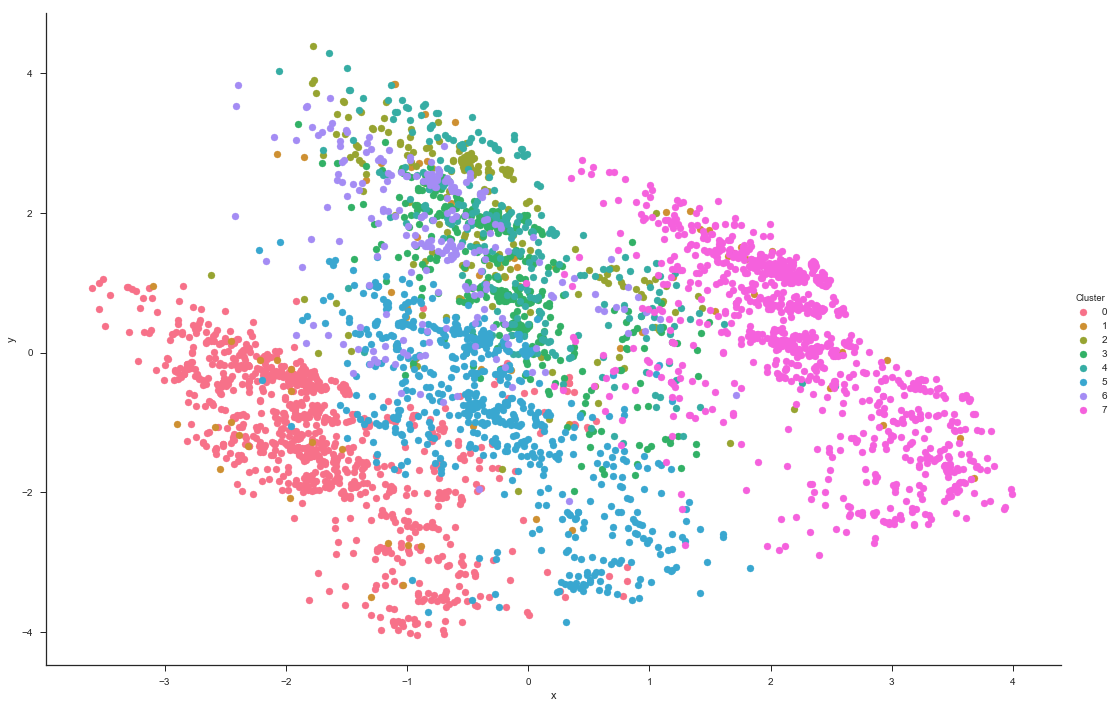

In [34]:

sns.set(style='ticks')

fg = sns.FacetGrid(data=new_data, hue='Cluster',size=10,aspect=1.5)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [35]:
compare_dat['Cluster'] = new_data.iloc[:,-1].values

In [36]:
mean_ages = pd.pivot_table(compare_dat,index='Cluster',aggfunc='mean').Age

In [37]:
pd.pivot_table(compare_dat,index='Cluster',aggfunc='mean')

,Age,Amphet,Any Opioid,Benzodiazepine,Cocaine,EtOH,Fentanyl,Heroin,Hydrocodone,Location_Hospital,...,Race_Chinese,Race_Hawaiian,"Race_Hispanic, Black","Race_Hispanic, White","Race_Native American, Other",Race_Other,Race_Unknown,Race_White,Sex,Tramad
Cluster,,,,,,,,,,,,,,,,,,,,,
0,42.787257,0.021598,0.194384,0.289417,0.315335,0.195464,0.254860,0.494600,0.018359,0.326134,...,0.001080,0.000000,0.003240,0.085313,0.000000,0.001080,0.003240,0.799136,0.277538,0.000000
1,49.121622,0.027027,0.229730,0.351351,0.108108,0.256757,0.162162,0.337838,0.040541,0.364865,...,0.000000,0.000000,0.027027,0.108108,0.000000,0.000000,0.000000,0.756757,0.324324,1.000000
2,40.648647,0.016216,0.216216,0.270270,0.248649,0.183784,0.324324,0.502703,0.027027,0.243243,...,0.000000,0.000000,0.000000,0.032432,0.000000,0.000000,0.010811,0.908108,0.194595,0.027027
3,41.436782,0.022989,0.166667,0.195402,0.252874,0.201149,0.295977,0.574713,0.045977,0.362069,...,0.002874,0.000000,0.000000,0.074713,0.002874,0.000000,0.000000,0.873563,0.250000,0.000000
4,40.138340,0.027668,0.201581,0.213439,0.197628,0.213439,0.359684,0.529644,0.023715,0.284585,...,0.000000,0.000000,0.003953,0.059289,0.000000,0.000000,0.007905,0.901186,0.320158,0.000000
5,40.851913,0.031614,0.164725,0.279534,0.301165,0.262895,0.314476,0.514143,0.024958,0.397671,...,0.000000,0.000000,0.003328,0.124792,0.000000,0.004992,0.008319,0.745424,0.291181,0.000000
6,40.243590,0.017094,0.226496,0.196581,0.179487,0.192308,0.230769,0.598291,0.029915,0.350427,...,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.008547,0.965812,0.290598,0.000000
7,42.807292,0.018750,0.193750,0.201042,0.296875,0.209375,0.371875,0.575000,0.029167,0.293750,...,0.000000,0.001042,0.003125,0.177083,0.000000,0.002083,0.009375,0.710417,0.252083,0.000000


## This section is all the time series analysis that is done on the total death number per month 

* This is starts by using a groupby function to join the year and month data and then using the size() to get the total elements in the each month set. 

* I then use a OLS Regression to find general linear regression and different stats to describe it

* Then I created an autocorelation plot to try and determine if the data is truly random or if there is a relationship (possibly period)

* Using a seasonal decompose function built into the statsmodel with a frequency of 12 to see if there is a monthly preiodicity that shows a relationship between number of deaths and the month of year





/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     221.7
Date:                Tue, 27 Feb 2018   Prob (F-statistic):           1.69e-29
Time:                        11:08:07   Log-Likelihood:                -293.39
No. Observations:                  66   AIC:                             590.8
Df Residuals:                      64   BIC:                             595.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0262      0.003      9.896      0.0

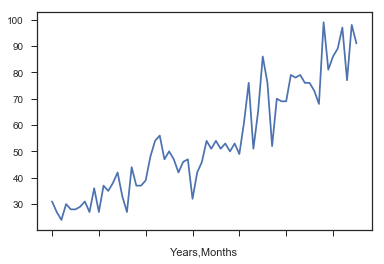

In [38]:
#Creating a table extract deaths per month data
table = compare_dat.groupby(['Years','Months']).size().plot(kind='line')

x = list(compare_dat.groupby(['Years','Months']).size().index)
y = (compare_dat.groupby(['Years','Months']).size().values)

#Running a simple Logisitc Regression
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


In [39]:
#Creating a DF to hold the deaths per year values
deaths_per_year = pd.DataFrame(y,x,columns=['Value'])
deaths_per_year.index.names=['Date']
deaths_per_year.reset_index(inplace=True)

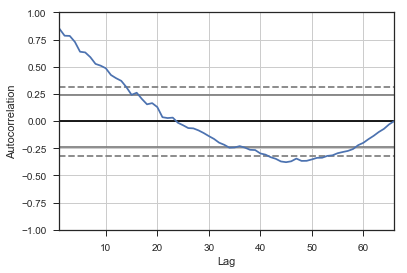

In [40]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(deaths_per_year['Value'])

In [41]:
from statsmodels.tsa.stattools import pacf
partialacf = pacf(deaths_per_year.Value[2:])


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [42]:
deaths_per_year.Date=deaths_per_year.Date.apply(lambda x:'-'.join((str(x[0])[:-2],str(x[1])[:-2])) + ('-01'))
deaths_per_year.Date = pd.to_datetime(deaths_per_year['Date'],format='%Y-%m-%d')

In [43]:
deaths_per_year.set_index(deaths_per_year.Date,inplace=True)

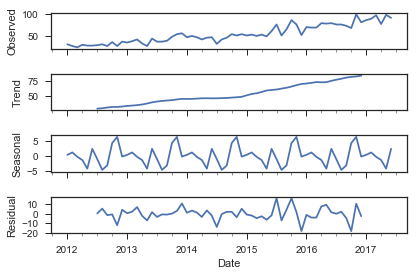

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostiton = seasonal_decompose(deaths_per_year.Value,freq=12,model = 'additive')
fig = plt.figure()
fig = decompostiton.plot()

In [45]:
#This code was got from http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/ and slightly modified by me 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print (dfoutput )

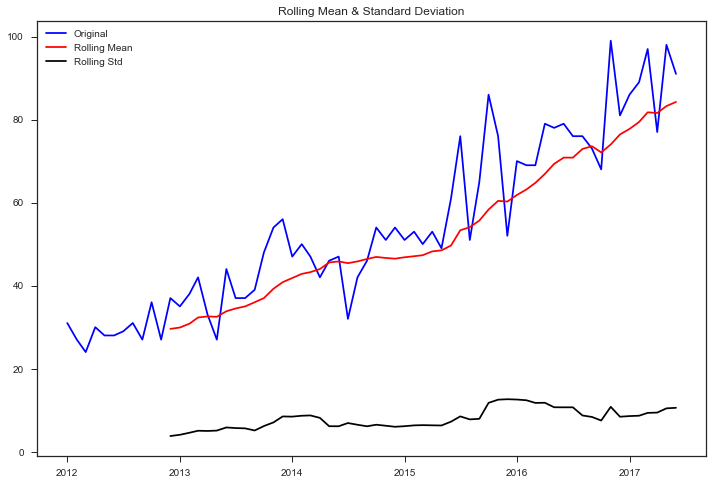

Results of Dickey-Fuller Test:
Test Statistic                  0.210942
p-value                         0.972869
#Lags Used                      5.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [46]:
test_stationarity(deaths_per_year.Value)

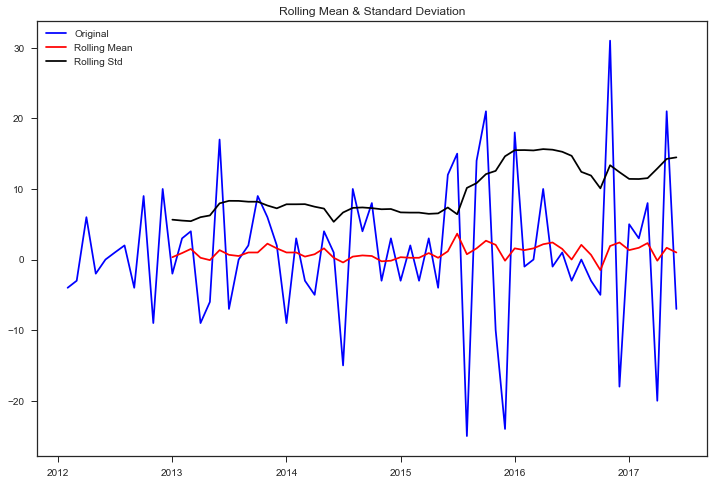

Results of Dickey-Fuller Test:
Test Statistic                 -5.331122
p-value                         0.000005
#Lags Used                      4.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [47]:
deaths_per_year['first_difference'] = deaths_per_year.Value - deaths_per_year.Value.shift(1)
test_stationarity(deaths_per_year.first_difference.dropna(inplace=False))

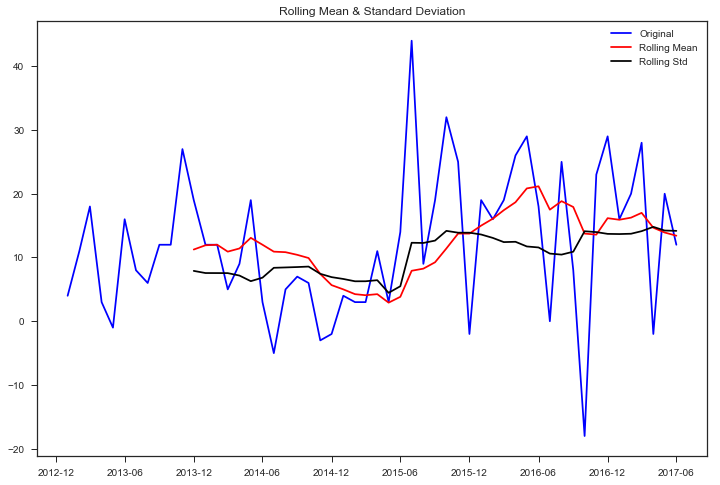

Results of Dickey-Fuller Test:
Test Statistic                 -2.748103
p-value                         0.066078
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [48]:
deaths_per_year['seasonal_difference'] = deaths_per_year.Value - deaths_per_year.Value.shift(12)
test_stationarity(deaths_per_year.seasonal_difference.dropna(inplace=False))

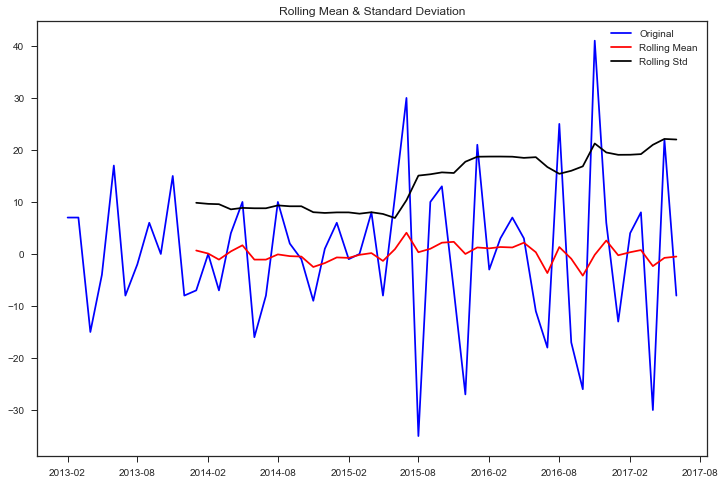

Results of Dickey-Fuller Test:
Test Statistic                 -1.778716
p-value                         0.391079
#Lags Used                     11.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [49]:
deaths_per_year['seasonal_first_difference'] = deaths_per_year.first_difference - deaths_per_year.first_difference.shift(12)
test_stationarity(deaths_per_year.seasonal_first_difference.dropna(inplace=False))    

In [50]:
"""residual = decompostiton.resid
residual.dropna(inplace=False)
test_stationarity(residual)"""

'residual = decompostiton.resid\nresidual.dropna(inplace=False)\ntest_stationarity(residual)'

We can see that there are minimal to no seasonal effects because the most stationary timeseries resulted in the first difference and did not result from either the seasonal or the seasonal coupled with the first difference 

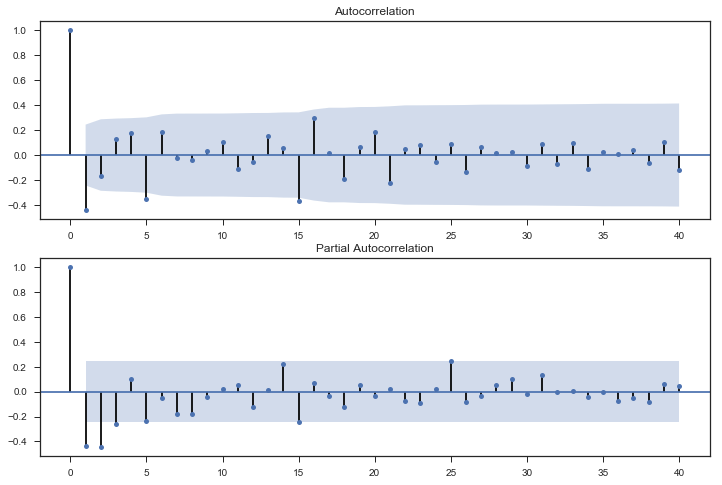

In [51]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(deaths_per_year.first_difference.iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(deaths_per_year.first_difference.iloc[1:],lags=40,ax=ax2)

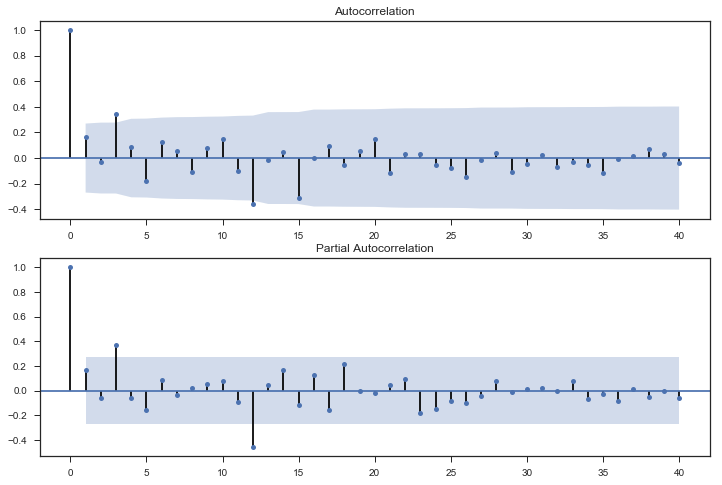

In [52]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(deaths_per_year.seasonal_difference.iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(deaths_per_year.seasonal_difference.iloc[13:],lags=40,ax=ax2)

In [53]:
from statsmodels.tsa.arima_model import ARIMA
deaths_per_year.Value = deaths_per_year.Value.astype(float)
arima = ARIMA(deaths_per_year.Value,(1,1,2))
results = arima.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   65
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -225.444
Method:                       css-mle   S.D. of innovations              7.610
Date:                Tue, 27 Feb 2018   AIC                            460.889
Time:                        11:08:09   BIC                            471.761
Sample:                    02-01-2012   HQIC                           465.179
                         - 06-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0108      0.101      9.983      0.000       0.812       1.209
ar.L1.D.Value     0.9318      0.129      7.204      0.000       0.678       1.185
ma.L1.D.Value    -1.7975      0.163    -11.022      0.000      -2.117      -1.478
ma.L2.D.Value     0.7975      0.160      4.973      0.000       0.483       1.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0732           +0.0000j            1.0732            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.2539           +0.0000j            1.2539            0.0000
-----------------------------------------------------------------------------
"""

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 3854.7203249499853')

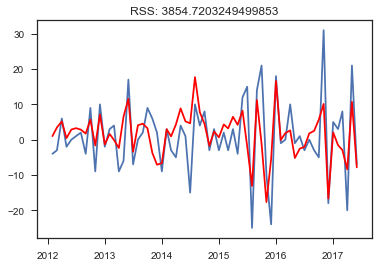

In [54]:
results_AR = arima.fit(disp=-1)  
plt.plot(deaths_per_year.first_difference)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: {}'.format(sum(((results_AR.fittedvalues-deaths_per_year.first_difference).dropna(inplace=False)**2))))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


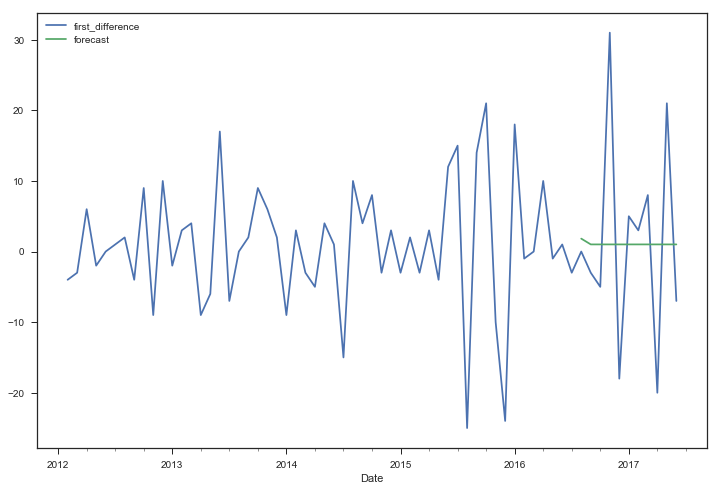

In [55]:
deaths_per_year['forecast'] = results.predict(start = 55, end= 66, dynamic= True)  
deaths_per_year[['first_difference', 'forecast']].plot(figsize=(12, 8))

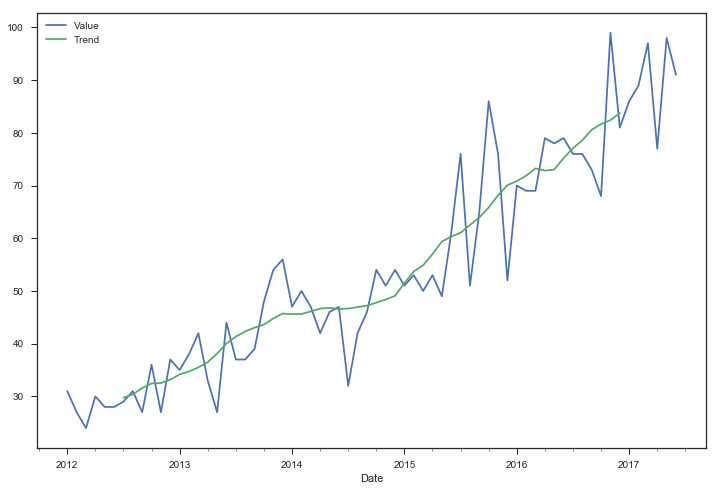

In [56]:
deaths_per_year['Trend'] = decompostiton.trend
deaths_per_year[['Value','Trend']].plot(figsize=(12,8))

In [57]:
mod = sm.tsa.statespace.SARIMAX(deaths_per_year.Value, trend='n', order=(1,1,2), seasonal_order=(1,1,1,12))
seasonal_results = mod.fit()
seasonal_results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Value   No. Observations:                   66
Model:             SARIMAX(1, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -193.725
Date:                            Tue, 27 Feb 2018   AIC                            399.449
Time:                                    11:08:11   BIC                            412.587
Sample:                                01-01-2012   HQIC                           404.641
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.089    -11.250      0.000      -1.174      -0.826
ma.L1          0.1413      0.353      0.400      0.689      -0.551       0.834
ma.L2         -0.7212      0.427     -1.690      0.091      -1.558       0.115
ar.S.L12      -0.1759      0.456     -0.386      0.700      -1.070       0.718
ma.S.L12      -0.9714      9.831     -0.099      0.921     -20.239      18.296
sigma2        58.9491    539.804      0.109      0.913    -999.047    1116.946
===================================================================================
Ljung-Box (Q):                       45.51   Jarque-Bera (JB):                 5.27
Prob(Q):                              0.25   Prob(JB):                         0.07
Heteroskedasticity (H):               1.89   Skew:                            -0.03
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

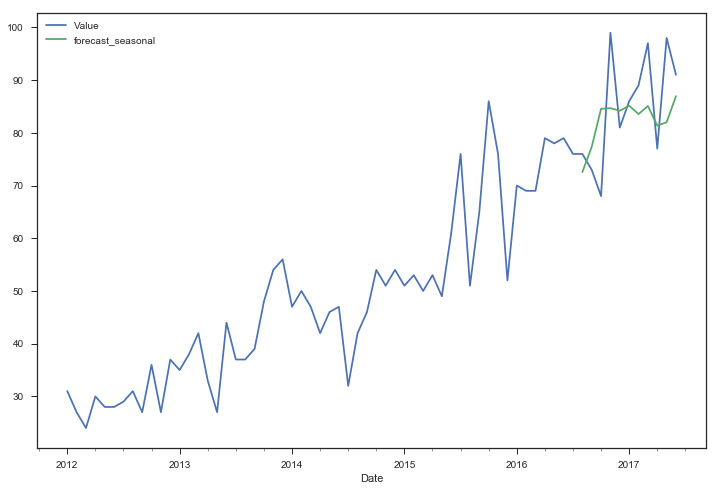

In [58]:
deaths_per_year['forecast_seasonal'] = seasonal_results.predict(start = 55, end= 66, dynamic= True)  
deaths_per_year[['Value', 'forecast_seasonal']].plot(figsize=(12, 8))

In [59]:
import datetime
import dateutil

In [60]:
start = datetime.datetime.strptime("2017-06-01", "%Y-%m-%d")
date_list = [start + dateutil.relativedelta.relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= deaths_per_year.columns)
deaths_per_year = pd.concat([deaths_per_year, future])

In [61]:
deaths_per_year

,Date,Value,first_difference,seasonal_difference,seasonal_first_difference,forecast,Trend,forecast_seasonal
2012-01-01,2012-01-01,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,2012-02-01,27.0,-4.0,NaN,NaN,NaN,NaN,NaN
2012-03-01,2012-03-01,24.0,-3.0,NaN,NaN,NaN,NaN,NaN
2012-04-01,2012-04-01,30.0,6.0,NaN,NaN,NaN,NaN,NaN
2012-05-01,2012-05-01,28.0,-2.0,NaN,NaN,NaN,NaN,NaN
2012-06-01,2012-06-01,28.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-07-01,2012-07-01,29.0,1.0,NaN,NaN,NaN,29.750000,NaN
2012-08-01,2012-08-01,31.0,2.0,NaN,NaN,NaN,30.375000,NaN
2012-09-01,2012-09-01,27.0,-4.0,NaN,NaN,NaN,31.583333,NaN
2012-10-01,2012-10-01,36.0,9.0,NaN,NaN,NaN,32.458333,NaN


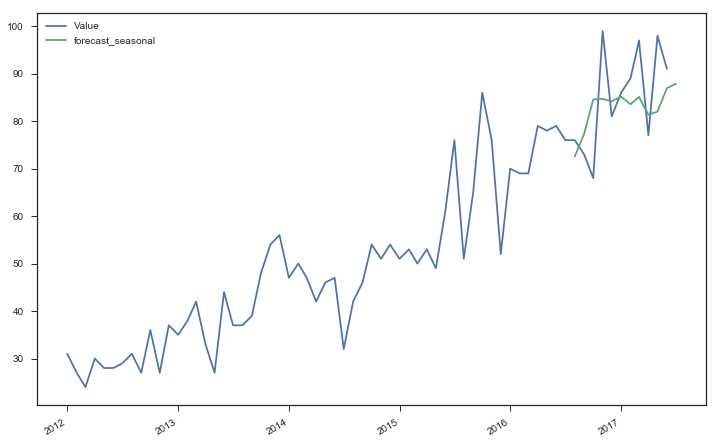

In [62]:
deaths_per_year['forecast_seasonal'] = seasonal_results.predict(start = 55, end= 66, dynamic= True)  
deaths_per_year[['Value', 'forecast_seasonal']].plot(figsize=(12, 8))

In [63]:
deaths_per_year=deaths_per_year[~deaths_per_year.index.duplicated(keep='first')]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


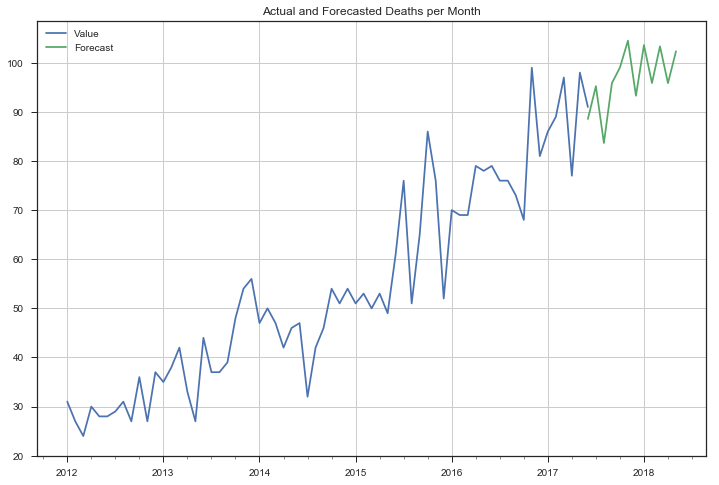

In [64]:
fig = plt.figure(figsize=(12, 8))
deaths_per_year['Forecast'] = seasonal_results.predict(start = 65, end= 77, dynamic= True)  
deaths_per_year[['Value', 'Forecast']].plot(figsize=(12, 8),grid=1)
plt.title('Actual and Forecasted Deaths per Month')
plt.savefig('death_forecast.png')
plt.show()
    

In [65]:
#Importing Ployly libraries
import plotly.plotly as py
import plotly.graph_objs as go

In [66]:
trace_actual = go.Scatter(
    x = deaths_per_year.index,
    y = deaths_per_year['Value'],
    name = 'Actual Deaths'
    
)
trace_predicted = go.Scatter(
    x = deaths_per_year.index,
    y = deaths_per_year['Forecast'],
    name ='Predicted Deaths'
)

# creating the actual and predicted scatter plot traces 

In [67]:
# ploting dot using plotly's interactive scatter plots 
data1=[trace_actual,trace_predicted]

layout = dict(title = 'Opioid Deaths per Month in Connecticut',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Number of Deaths'),
              )

fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='forecast')

In [69]:
# using counter to tally deaths per county and using pivot tables to generate important statistics 
from collections import Counter
county_death_numbers = dict(Counter(data.New_Death_Counties).most_common(8))
county_mean_age = dict(pd.pivot_table(data,index='New_Death_Counties',aggfunc='mean').Age)
county_sex_percentage = dict(pd.pivot_table(data,index='New_Death_Counties',aggfunc='mean').Sex)

In [70]:
# creating scaling constnat for the cholorpleth map 
death_scaling = [value for key,value in county_death_numbers.items()]
death_scaling = sum(death_scaling)

In [71]:
# importing bokeh libraries and setting up CT county workspace
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Reds6 as palette
from bokeh.plotting import figure, output_file

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "ct"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [county_death_numbers[county]/death_scaling for county in county_names]
county_unemployment_rate = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)


county_names = [county['name'] for county in counties.values()]

In [73]:
# creating properly ordered lists to use on the cholorpleth map
cnty_mean_age=[]
cnty_sex_male=[]
cnty_sex_female=[]
cnty_death_numb=[]
for county in county_names:
    cnty_mean_age.append(county_mean_age[county])
    cnty_sex_female.append(county_sex_percentage[county]*100)
    cnty_sex_male.append((1-county_sex_percentage[county])*100)
    cnty_death_numb.append(county_death_numbers[county])

In [74]:
# creating bokeh interactive cholorpleth map 
source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
    unemployment_rate =county_unemployment_rate,
    mean_age =cnty_mean_age,
    sex_male = cnty_sex_male,
    sex_female = cnty_sex_female,
    cnty_death = cnty_death_numb
    
))

TOOLS = "pan,wheel_zoom,reset,hover,save"


p = figure(
    title="Connecticut Opioid Deaths", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None
p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.8, line_color="black", line_width=0.3)


hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("County Name", "@name"),
    ("Total Deaths", "@cnty_death"),
    ("Mean Age","@mean_age"),
    ("Percentage Male","@sex_male%"),
    ("Percentage Female", "@sex_female%"),
    ("Unemployment Rate",'@unemployment_rate%'),
    ("(Long, Lat)", "($x, $y)"),
    
]



In [75]:
# importingt libraries and saving generated map to a html file 
from bokeh.resources import CDN
from bokeh.embed import file_html

html = file_html(p, CDN, "my plot")
html_file = open('ct_plot','w')
html_file.write(html)
html_file.close()